In [5]:
import os
from pathlib import Path


import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

HERE = Path(os.getcwd())
HERE

OUT_PATH = HERE / "output"
if not OUT_PATH.exists():
    OUT_PATH.mkdir(exist_ok=True)

In [10]:
with open(HERE / "config" / "config.yaml", 'r') as f:
    config= yaml.safe_load(f)
font_path = HERE / config["font_path"]
assert font_path.exists()
config

{'font_path': './fonts/IPAexfont00401/ipaexg.ttf', 'output_path': './output/'}

In [11]:
names_df = pd.read_csv(
    Path(HERE) / "config" / "names.csv", header=0
)
names_df

,number,name,kana,group
0,1,安藤 光希,あんどう こうき,A
1,2,石田 晴香,いしだ はるか,A
2,3,井上 蓮斗,いのうえ れんと,A
3,4,上原 芽衣,うえはら めい,A
4,5,大久保 悠真,おおくぼ ゆうま,A
5,6,加藤 紗季,かとう さき,A
6,7,川口 翔,かわぐち しょう,A
7,8,北村 莉央,きたむら りお,A
8,9,小林 拓海,こばやし たくみ,A
9,10,斉藤 美月,さいとう みづき,A


In [12]:
layout_df = pd.read_csv(
    Path(HERE) / "config" / "layout.csv", header=0, index_col=0
)
layout_df

,1,2,3,4,5,6
0,,,,,,
1,x,A,A,A,A,x
2,B,B,B,B,B,B
3,B,B,B,B,B,B
4,B,B,B,B,B,B
5,B,B,B,B,B,B
6,B,B,B,B,B,B


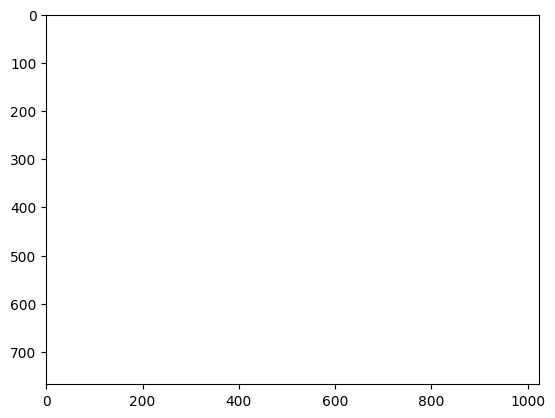

In [13]:
img = Image.new("RGB", (
    1024, 768
), color=(255, 255, 255))
draw = ImageDraw.Draw(img)
plt.imshow(img)

In [16]:
def draw_name_box(number: int, name: str, kana: str, xyxy: list[int], out_color: str | tuple = "black"):
    draw.rectangle(
        xyxy,
        fill=(255, 255, 255),
        outline=out_color,
    )
    draw.text(
        (xyxy[0] + 10, xyxy[1] + 10),
        f"{number} {name}",
        fill=out_color,
        font=ImageFont.truetype(font_path, size=32),
    )

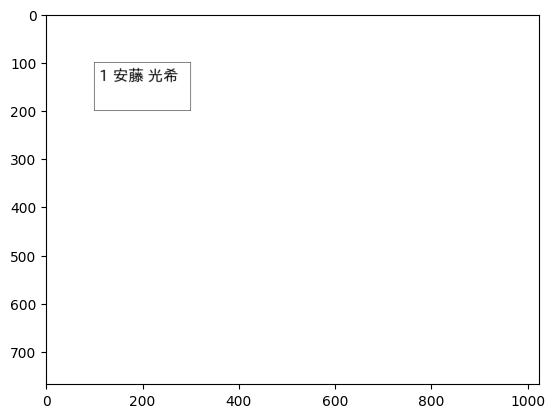

In [17]:
draw_name_box(
    1,
    names_df.iloc[0]["name"],
    names_df.iloc[0]["kana"],
    [100, 100, 300, 200],
    out_color="black"
)
plt.imshow(img)